In [ ]:
# get data
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil
import csv
#To Group Images into Classes
#source_folder = "/content/drive/MyDrive/Dissertation Data/Mammogram images"
#description_file = "/content/drive/MyDrive/Dissertation Data/description.csv"
#new_folder = "/content/drive/MyDrive/Dissertation Data/labels_folder"

#with open(description_file, "r") as csvfile:
    #reader = csv.reader(csvfile)
    #next(reader)

    #for row in reader:
        #image_file, label = row


        #source_image = os.path.join(source_folder, image_file)
        #new_image = os.path.join(new_folder, image_file)
        #shutil.move(source_image, new_image)

#print("All Images sorted into new folder.")


In [ ]:
#Importing relevant libraries
import math
os.environ ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import pathlib
import numpy as np
np.random.seed(42)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from glob import glob
!pip install patchify
from patchify import patchify
import seaborn as sns
!pip install Pillow
!pip install -U tensorflow-addons
!pip install tensorflow numpy matplotlib
!pip install vit-keras
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from vit_keras import vit, utils
from sklearn.metrics import classification_report
from keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, load_img
import glob
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import MobileNetV3Large
from keras.models import Model
from sklearn.metrics import confusion_matrix
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
!pip import timm
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision import transforms
from torchsummary import summary
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from keras.layers import Dense,GlobalAveragePooling2D, GlobalMaxPool2D, BatchNormalization, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Layer, Dense, Dropout, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ERROR: unknown command "import"


In [ ]:
import pandas as pd
data_text = "/content/drive/MyDrive/Dissertation Data/data_text.csv"
text_df =pd.read_csv(data_text)
text_df.head(5)

,Refnum,Bg,Class,Severity,X,Y,Radius,Path,Cancer,Path_save
0,mdb001,G,CIRC,B,535.0,425.0,197.0,mdb001.png,0,images/mdb001.png
1,mdb002,G,CIRC,B,522.0,280.0,69.0,mdb002.png,0,images/mdb002.png
2,mdb003,D,NORM,NaN,NaN,NaN,NaN,mdb003.png,0,images/mdb003.png
3,mdb004,D,NORM,NaN,NaN,NaN,NaN,mdb004.png,0,images/mdb004.png
4,mdb005,F,CIRC,B,477.0,133.0,30.0,mdb005.png,0,images/mdb005.png


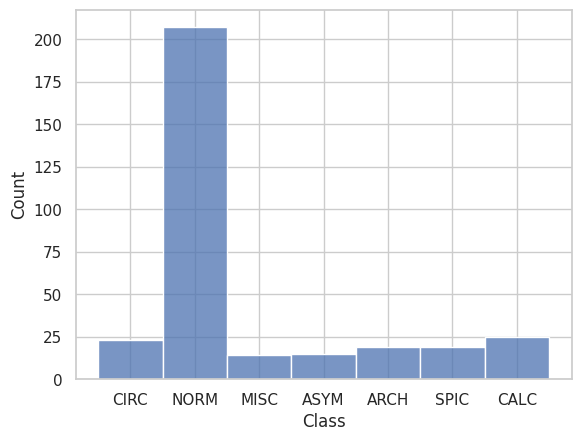

In [ ]:

sns.histplot(data=text_df, x='Class')

plt.show()

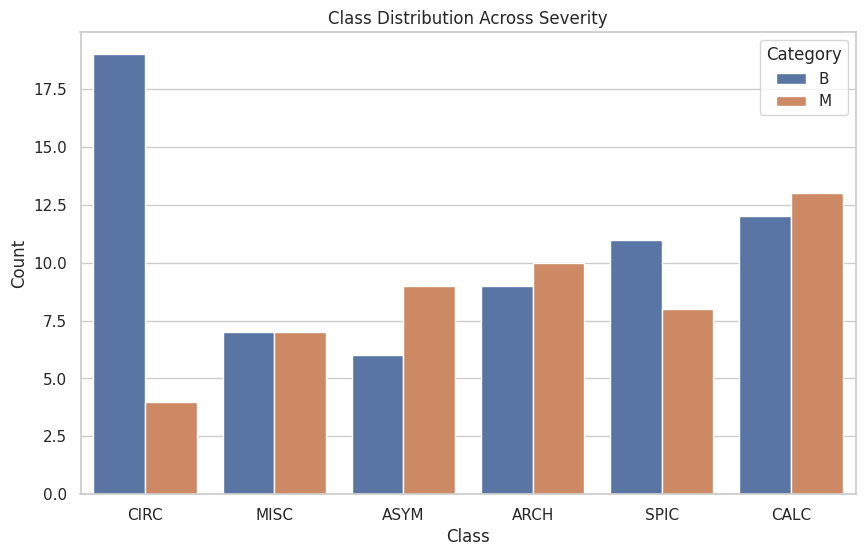

In [ ]:

sns.set(style="whitegrid")

text_df= text_df[text_df['Class'] != 'NORM']

plt.figure(figsize=(10, 6))
sns.countplot(data=text_df, x='Class', hue='Severity')
plt.title('Class Distribution Across Severity')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()


In [ ]:

list_class_names = os.listdir("/content/drive/MyDrive/Dissertation Data/labels_folder")
list_class_names

['ASYM M',
 'SPIC B',
 'SPIC M',
 'CALC M',
 'CIRC B',
 'NORM',
 'CALC B',
 'MISC M',
 'MISC B',
 'CIRC M',
 'ARCH M',
 'ARCH B',
 'ASYM B']

In [ ]:
# import pathlib
# from pathlib import Path
# data_images_path = Path("/content/drive/MyDrive/Dissertation Data/labels_folder")
# #data_count = len(list(data_images_path.glob("*")))
# data_count = len(list(data_images_path.glob("*/*")))
# data_count

322

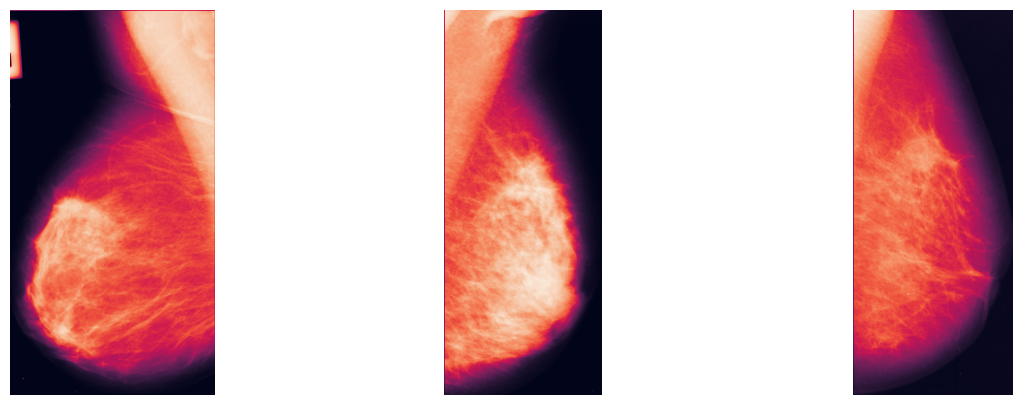

In [ ]:
#DISPLAY FIRST THREE IMAGES FROM THE IMAGE FOLDER
data_images_path = Path("/content/drive/MyDrive/Dissertation Data/labels_folder")

image_paths = list(data_images_path.glob("**/*.png"))

fig = plt.figure(figsize=(15, 5))

for i, image_path in enumerate(image_paths[:3]):
    image = Image.open(image_path)
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(image)
    ax.axis('off')

plt.show()


In [ ]:
#DATA AUGMNETATION

#import random

# data_images_path = "/content/drive/MyDrive/Dissertation Data/labels_folder"

# # TO CREATE ADDITIONAL IMAGES FOR EACH FOLDER EXCEPT THE 'NORM' CLASS
# class_folders = [folder for folder in os.listdir(data_images_path) if folder != "NORM"]

# # SET AUGMENTATION FACTOR PER ORIGINAL IMAGE
# augmentation_factor = 10

# # Define AUGMENTATION GENERATOR
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')

# for class_folder in class_folders:
#     class_path = os.path.join(data_images_path, class_folder)
#     images = os.listdir(class_path)

#     for image_file in image_files:
#         images_path = os.path.join(class_path, images)
#         img = load_img(images_path)
#         x = img_to_array(img)
#         x = x.reshape((1,) + x.shape)

#         # GENERATE AND SAVE NEW IMAGES BY A FACTOR OF 10 PER ORIGINAL IMAGE
#         i = 0
#         for batch in datagen.flow(x, batch_size=1, save_to_dir=class_path, save_prefix='aug', save_format='png'):
#             i += 1
#             if i >= augmentation_factor:
#                 break

# print("New Images created and saved")


In [ ]:
data_images_path = Path("/content/drive/MyDrive/Dissertation Data/labels_folder")
#data_count = len(list(data_images_path.glob("*")))
data_count = len(list(data_images_path.glob("*/*")))
data_count

1465

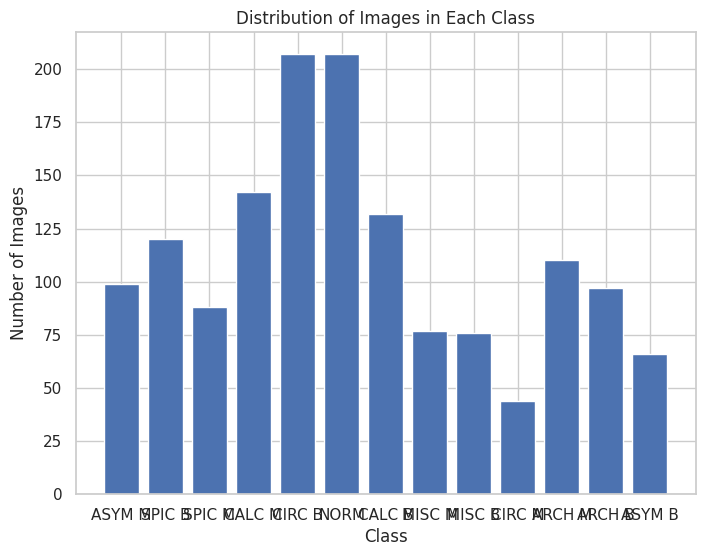

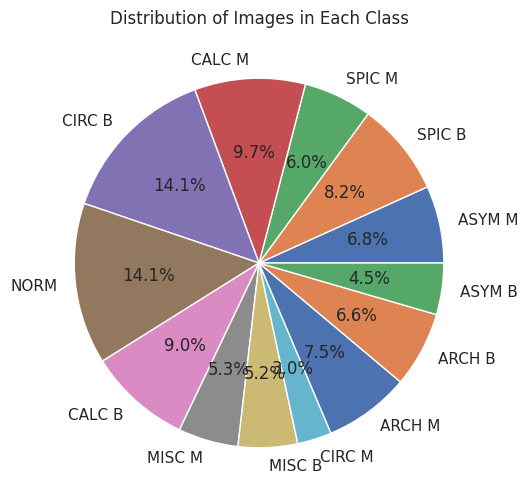

In [ ]:
 #TO CHECK DISTRIBUTION OF IMAGES IN EACH CLASS
 class_names = list_data_images
 class_counts = []

  for path in data_images_path.glob("*"):
     image_count = len(os.listdir(path))
     class_counts.append(image_count)

 # Plotting a bar plot
 plt.figure(figsize=(8, 6))
 plt.bar(class_names, class_counts)
 plt.xlabel('Class')
 plt.ylabel('Number of Images')
 plt.title('Distribution of Images in Each Class')# plt.show()

 # Plotting a pie plot
 plt.figure(figsize=(8, 6))
 plt.pie(class_counts, labels=class_names, autopct='%1.1f%%')
 plt.title('Distribution of Images in Each Class')
 plt.show()


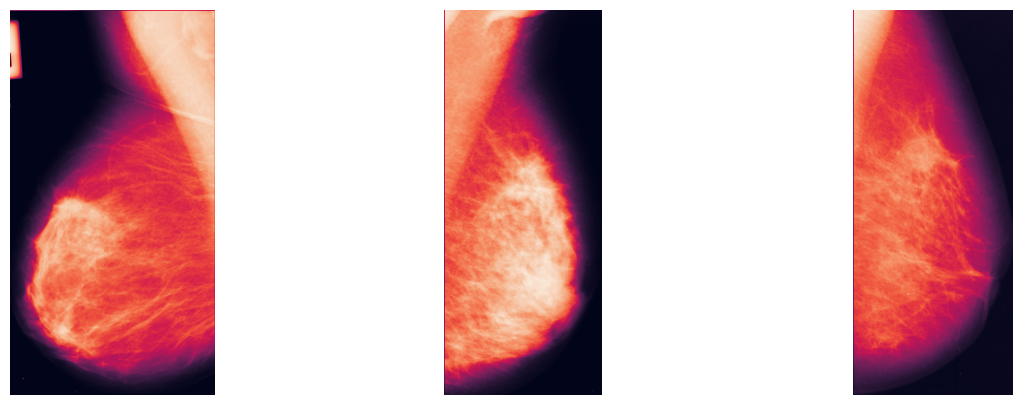

In [ ]:

data_images_path = Path("/content/drive/MyDrive/Dissertation Data/labels_folder")

# TO DISPLAY FIRST THREE IMAGES OF AUGMENTEDIMAGES
image_paths = list(data_images_path.glob("**/*.png"))

fig = plt.figure(figsize=(15, 5))

for i, image_path in enumerate(image_paths[:3]):
    image = Image.open(image_path)
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(image)
    ax.axis('off')

plt.show()


In [ ]:
##TO SPLIT DATA ACROSS TRAIN, TEST AND VALIDATION FOLDER
# import os
# import shutil
# import random

# source_folder = '/content/drive/MyDrive/Dissertation Data/labels_folder'
# split_folder = '/content/drive/MyDrive/Dissertation Data/split_labels_data'
# train_data_dir = os.path.join(split_folder, 'train')
# validation_data_dir = os.path.join(split_folder, 'validation')
# test_data_dir = os.path.join(split_folder, 'test')

# # LIST ALL CLASS FOLDER FROM SOURCE
# class_folders = os.listdir(source_folder)

# # LIST ALL DIRECTORIES
# os.makedirs(train_data_dir, exist_ok=True)
# os.makedirs(validation_data_dir, exist_ok=True)
# os.makedirs(test_data_dir, exist_ok=True)

# for class_folder in class_folders:
#     class_source_folder = os.path.join(source_folder, class_folder)

#     # CREATE FOLDER FOR TRAIN, TEST AND VALIDATION
#     train_folder = os.path.join(train_data_dir, class_folder)
#     validation_folder = os.path.join(validation_data_dir, class_folder)
#     test_folder = os.path.join(test_data_dir, class_folder)

#     os.makedirs(train_folder, exist_ok=True)
#     os.makedirs(validation_folder, exist_ok=True)
#     os.makedirs(test_folder, exist_ok=True)

#     # LIST AND SHUFFLE IMAGE FILES
#     image_files = os.listdir(class_source_folder)
#     random.shuffle(image_files)

#     # DEFINE SPLIT FACTOR
#     num_images = len(image_files)
#     num_train = int(0.7 * num_images)
#     num_validation = int(0.2 * num_images)

#     # DISTRIBUTE IMAGES TO TRAIN TEST AND VALIDATION
#     train_files = image_files[:num_train]
#     validation_files = image_files[num_train:num_train + num_validation]
#     test_files = image_files[num_train + num_validation:]

#     for filename in train_files:
#         src = os.path.join(class_source_folder, filename)
#         dst = os.path.join(train_class_dir, filename)
#         shutil.copy(src, dst)

#     for filename in validation_files:
#         src = os.path.join(class_source_folder, filename)
#         dst = os.path.join(validation_folder, filename)
#         shutil.copy(src, dst)

#     for filename in test_files:
#         src = os.path.join(class_source_folder, filename)
#         dst = os.path.join(test_class_dir, filename)
#         shutil.copy(src, dst)


In [ ]:
# # TO CONFIRM NUMBER DISTRIBUTED IN TRAIN, TEST AND VALIDATION FOLDER


data_folder_path = "/content/drive/MyDrive/Dissertation Data/split_labels_data"

subfolders = ["train", "test", "validation"]

# # TO ITERATE AND COUNT NUMBER OF IMAGES IN EACH FOLDER AND SUBFOLDERS
for subfolder in subfolders:
     subfolder_path = os.path.join(data_folder_path, subfolder)
     total_images = 0

     for class_folder in os.listdir(subfolder_path):
         class_folder_path = os.path.join(subfolder_path, class_folder)
         num_images = len([f for f in os.listdir(class_folder_path) if os.path.isfile(os.path.join(class_folder_path, f))])
         total_images += num_images

     print(f"Total number of images in {subfolder}: {total_images}")

Total number of images in train: 1019
Total number of images in test: 157
Total number of images in validation: 289


In [ ]:
#TO CONFIRM CLASS IN THE TRAIN FOLDER AND COUNT PER CLASS
import os
train_data_folder ="/content/drive/MyDrive/Dissertation Data/split_labels_data/train"
all_folders = [d for d in os.listdir(train_data_folder) if os.path.isdir(os.path.join(train_data_folder, d))]
for folder in all_folders:
    folder_path = os.path.join(train_data_folder, folder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png'))]
    num_images = len(image_files)
    print(f"Folder: {folder}, Number of Images: {num_images}")


In [ ]:

validation_data_dir = "/content/drive/MyDrive/Dissertation Data/split_labels_data/validation"
# Replace with your actual directory path

# Get a list of subdirectories in the train_data_dir
folders = [d for d in os.listdir(validation_data_dir) if os.path.isdir(os.path.join(validation_data_dir, d))]

# Iterate through each subdirectory and count the number of image files
for folder in folders:
    folder_path = os.path.join(validation_data_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png'))]
    num_images = len(image_files)
    print(f"Folder: {folder}, Number of Images: {num_images}")


Folder: ARCH-B, Number of Images: 20
Folder: ARCH-M, Number of Images: 23
Folder: ASYM-B, Number of Images: 18
Folder: ASYM-M, Number of Images: 20
Folder: CALC-B, Number of Images: 21
Folder: CALC-M, Number of Images: 23
Folder: CIRC-B, Number of Images: 19
Folder: CIRC-M, Number of Images: 19
Folder: MISC-B, Number of Images: 20
Folder: MISC-M, Number of Images: 20
Folder: NORM, Number of Images: 44
Folder: SPIC-B, Number of Images: 21
Folder: SPIC-M, Number of Images: 21


In [ ]:
train_data_dir = '/content/drive/MyDrive/Dissertation Data/split_labels_data/train'
validation_data_dir = '/content/drive/MyDrive/Dissertation Data/split_labels_data/validation'
test_data_dir = '/content/drive/MyDrive/Dissertation Data/split_labels_data/test'

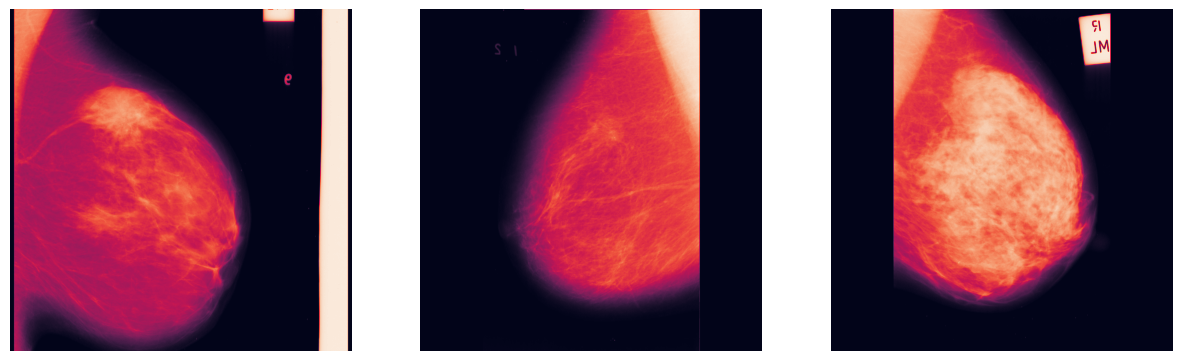

In [ ]:

data_images_path = Path("/content/drive/MyDrive/Dissertation Data/split_labels_data")

# Get a list of all image file paths in the subfolders
image_paths = list(data_images_path.glob("**/*.png"))  # Replace with the appropriate file extension

# Display the first three images
fig = plt.figure(figsize=(15, 5))

for i, image_path in enumerate(image_paths[:3]):
    image = Image.open(image_path)
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(image)
    ax.axis('off')

plt.show()


In [ ]:
# #TO CONFIRM  THE NUMBER OF CLASSES FOR CLASSIFICATION

train_data_dir = '/content/drive/MyDrive/Dissertation Data/split_labels_data/train'
folders = glob.glob(os.path.join(train_data_dir, "*"))

number_of_class = len(folders)
number_of_class

13

In [ ]:
# Train, test and validation data generator
train_datagen = ImageDataGenerator(featurewise_center=False,
                                   rotation_range = 5, fill_mode="nearest",
                                   zoom_range=[1/1.0, 1/1.0], width_shift_range=0.0, height_shift_range=0.0,
                                   horizontal_flip = True, vertical_flip=True,
                                   brightness_range=[0.5, 1.3], channel_shift_range=20)

val_test_datagen = ImageDataGenerator()


train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                target_size=(224, 224), # typical imagenet dimensions
                                                batch_size=32,
                                                class_mode='categorical', shuffle=True)



validation_generator = val_test_datagen.flow_from_directory(validation_data_dir,
                                                target_size=(224, 224),
                                                class_mode='categorical',
                                                shuffle=True)



test_generator = val_test_datagen.flow_from_directory(test_data_dir,
                                                target_size=(224, 224),
                                                batch_size=1,
                                                class_mode='categorical',
                                                shuffle=False)
# # Read all the data and labels from the generator
data, labels = next(train_generator)

# # Convert the data and labels to NumPy arrays
data_array = np.array(data)
labels_array = np.array(labels)

# # Print the shape of the data and labels arrays
print("Data shape:", data_array.shape)
print("Labels shape:", labels_array.shape)


Found 1019 images belonging to 13 classes.
Found 289 images belonging to 13 classes.
Found 157 images belonging to 13 classes.
Data shape: (32, 224, 224, 3)
Labels shape: (32, 13)


In [ ]:

# CONVERT TRAIN DATA AND LABEL TO NUMPY ARRAYS
train_data = []
train_labels = []
for batch in train_generator:
    data, labels = batch
    train_data.append(np.array(data))
    train_labels.append(np.array(labels))
    if len(train_data) * train_generator.batch_size >= len(train_generator.filenames):
        break
train_data_array = np.concatenate(train_data)
train_labels_array = np.concatenate(train_labels)

# CONVERT VALIDATION DATA AND LABEL TO NUMPY ARRAYS
validation_data = []
validation_labels = []
for batch in validation_generator:
    data, labels = batch
    validation_data.append(np.array(data))
    validation_labels.append(np.array(labels))
    if len(validation_data) * validation_generator.batch_size >= len(validation_generator.filenames):
        break
validation_data_array = np.concatenate(validation_data)
validation_labels_array = np.concatenate(validation_labels)

# CONVERT TEST DATA AND LABEL TO NUMPY ARRAYS
test_data = []
test_labels = []
for batch in test_generator:
    data, labels = batch
    test_data.append(np.array(data))
    test_labels.append(np.array(labels))
    if len(test_data) * test_generator.batch_size >= len(test_generator.filenames):
        break
test_data_array = np.concatenate(test_data)
test_labels_array = np.concatenate(test_labels)

# PRINT THE SHAPES OF THE DATA AND LABELS ARRAYS
print("Train data shape:", train_data_array.shape)
print("Train labels shape:", train_labels_array.shape)
print("Validation data shape:", validation_data_array.shape)
print("Validation labels shape:", validation_labels_array.shape)
print("Test data shape:", test_data_array.shape)
print("Test labels shape:", test_labels_array.shape)


Train data shape: (1019, 224, 224, 3)
Train labels shape: (1019, 13)
Validation data shape: (289, 224, 224, 3)
Validation labels shape: (289, 13)
Test data shape: (157, 224, 224, 3)
Test labels shape: (157, 13)


In [ ]:
#CNN Model
#CNN Sequential Model

num_classes = 13

cnn_model = Sequential()

# Convolutional Layer with input shape (64,64,3)
cnn_model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(224,224,3)) )

cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
cnn_model.add(MaxPool2D(pool_size=(2,2)))

early_stopping = tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dense(units=num_classes, activation='softmax'))

cnn_model.compile(optimizer= Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
                  metrics=['accuracy'])


cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 128)      

In [ ]:
#Training

epochs = 30
early_stopping = tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

c = cnn_model.fit(train_generator, epochs=epochs,
                   validation_data=validation_generator,
                   callbacks=[early_stopping])

Epoch 1/30
32/32 [==============================] - 48s 1s/step - loss: 11.8159 - accuracy: 0.1423 - val_loss: 2.4137 - val_accuracy: 0.1765
Epoch 2/30
32/32 [==============================] - 47s 1s/step - loss: 2.2127 - accuracy: 0.2974 - val_loss: 1.7372 - val_accuracy: 0.4602
Epoch 3/30
32/32 [==============================] - 47s 1s/step - loss: 1.8117 - accuracy: 0.4082 - val_loss: 1.5216 - val_accuracy: 0.4775
Epoch 4/30
32/32 [==============================] - 47s 1s/step - loss: 1.4704 - accuracy: 0.5564 - val_loss: 1.3593 - val_accuracy: 0.5467
Epoch 5/30
32/32 [==============================] - 47s 1s/step - loss: 1.2238 - accuracy: 0.6271 - val_loss: 1.2726 - val_accuracy: 0.5882
Epoch 6/30
32/32 [==============================] - 47s 1s/step - loss: 1.0327 - accuracy: 0.7066 - val_loss: 1.0614 - val_accuracy: 0.6609
Epoch 7/30
32/32 [==============================] - 47s 1s/step - loss: 0.9046 - accuracy: 0.7321 - val_loss: 0.7362 - val_accuracy: 0.7301
Epoch 8/30
32/32 [=

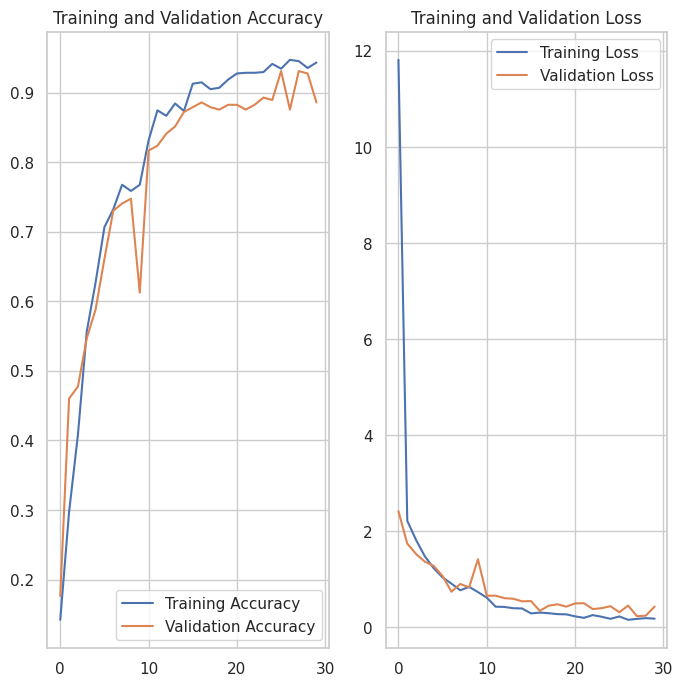

In [ ]:
acc = c.history['accuracy']
val_acc = c.history['val_accuracy']

loss = c.history['loss']
val_loss = c.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# # Make predictions on the test set
y_true = test_generator.classes
y_pred = cnn_model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# # Generate the classification report
target_names = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=target_names)

print(report)

157/157 [==============================] - 3s 18ms/step
              precision    recall  f1-score   support

      ARCH-B       1.00      1.00      1.00        10
      ARCH-M       1.00      1.00      1.00        13
      ASYM-B       1.00      1.00      1.00        10
      ASYM-M       1.00      1.00      1.00        10
      CALC-B       0.77      0.83      0.80        12
      CALC-M       0.67      0.83      0.74        12
      CIRC-B       1.00      1.00      1.00        10
      CIRC-M       1.00      1.00      1.00        11
      MISC-B       1.00      1.00      1.00        11
      MISC-M       1.00      1.00      1.00        11
        NORM       1.00      0.78      0.88        23
      SPIC-B       0.92      1.00      0.96        12
      SPIC-M       1.00      1.00      1.00        12

    accuracy                           0.94       157
   macro avg       0.95      0.96      0.95       157
weighted avg       0.95      0.94      0.94       157



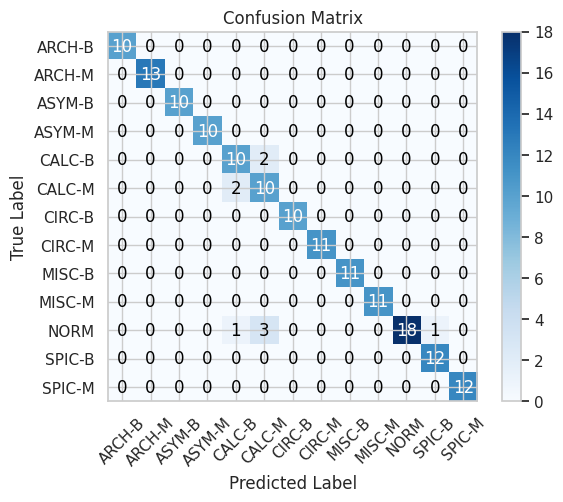

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix with annotations
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = test_generator.class_indices
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
num_classes = cm.shape[0]
tp = np.diag(cm)
tn = np.sum(cm) - (np.sum(cm, axis=0) + np.sum(cm, axis=1) - tp)
fp = np.sum(cm, axis=0) - tp
fn = np.sum(cm, axis=1) - tp

# Print the results for each class
for i in range(num_classes):
    print(f"Class {i+1}: TP={tp[i]}, TN={tn[i]}, FP={fp[i]}, FN={fn[i]}")

Class 1: TP=10, TN=147, FP=0, FN=0
Class 2: TP=13, TN=144, FP=0, FN=0
Class 3: TP=10, TN=147, FP=0, FN=0
Class 4: TP=10, TN=147, FP=0, FN=0
Class 5: TP=10, TN=142, FP=3, FN=2
Class 6: TP=10, TN=140, FP=5, FN=2
Class 7: TP=10, TN=147, FP=0, FN=0
Class 8: TP=11, TN=146, FP=0, FN=0
Class 9: TP=11, TN=146, FP=0, FN=0
Class 10: TP=11, TN=146, FP=0, FN=0
Class 11: TP=18, TN=134, FP=0, FN=5
Class 12: TP=12, TN=144, FP=1, FN=0
Class 13: TP=12, TN=145, FP=0, FN=0


In [ ]:
#RESNET 50
num_classes = 13
from keras.applications import ResNet50
Res50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in Res50_base_model.layers[:80]:
        layer.trainable = False
for layer in Res50_base_model.layers[80:]:
        layer.trainable = True

x = Res50_base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
preds = Dense(num_classes, activation='softmax')(x)
Res50_model = Model(inputs=Res50_base_model.input, outputs=preds)

Res50_model.summary()
epochs = 50
optimizer = Adam(learning_rate=1e-3)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)
Res50_model.compile(optimizer=optimizer,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])




Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
#Training the  Model
r = Res50_model.fit(train_generator, epochs=epochs,
                   validation_data=validation_generator,
                   callbacks=[early_stopping])

Epoch 1/50
32/32 [==============================] - 56s 2s/step - loss: 3.7285 - accuracy: 0.1501 - val_loss: 5407.2539 - val_accuracy: 0.0692
Epoch 2/50
32/32 [==============================] - 48s 1s/step - loss: 2.9108 - accuracy: 0.2110 - val_loss: 230.7845 - val_accuracy: 0.0623
Epoch 3/50
32/32 [==============================] - 48s 1s/step - loss: 2.5130 - accuracy: 0.2983 - val_loss: 106.9153 - val_accuracy: 0.0692
Epoch 4/50
32/32 [==============================] - 47s 1s/step - loss: 2.0258 - accuracy: 0.4171 - val_loss: 31.9900 - val_accuracy: 0.0969
Epoch 5/50
32/32 [==============================] - 48s 1s/step - loss: 1.7950 - accuracy: 0.4877 - val_loss: 68.3487 - val_accuracy: 0.0623
Epoch 6/50
32/32 [==============================] - 49s 2s/step - loss: 1.4985 - accuracy: 0.5692 - val_loss: 19.2491 - val_accuracy: 0.2215
Epoch 7/50
32/32 [==============================] - 48s 1s/step - loss: 1.3020 - accuracy: 0.6418 - val_loss: 2.4119 - val_accuracy: 0.4810
Epoch 8/50

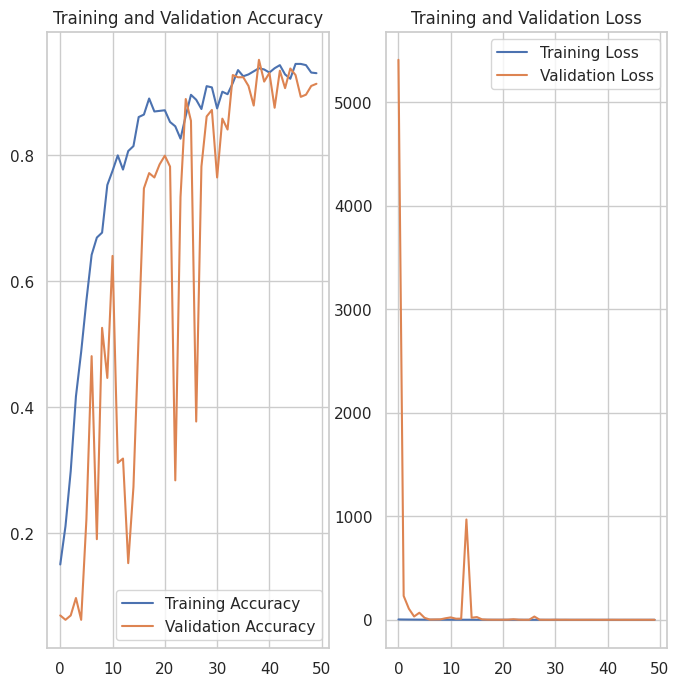

In [ ]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

# # Make predictions on the test set
y_true = test_generator.classes
y_pred = Res50_model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# # Generate the classification report
target_names = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=target_names)

print(report)


157/157 [==============================] - 8s 48ms/step
              precision    recall  f1-score   support

      ARCH-B       1.00      0.90      0.95        10
      ARCH-M       0.93      1.00      0.96        13
      ASYM-B       0.91      1.00      0.95        10
      ASYM-M       1.00      1.00      1.00        10
      CALC-B       0.62      0.42      0.50        12
      CALC-M       0.60      0.75      0.67        12
      CIRC-B       1.00      1.00      1.00        10
      CIRC-M       0.92      1.00      0.96        11
      MISC-B       1.00      1.00      1.00        11
      MISC-M       1.00      1.00      1.00        11
        NORM       0.91      0.87      0.89        23
      SPIC-B       1.00      1.00      1.00        12
      SPIC-M       1.00      1.00      1.00        12

    accuracy                           0.91       157
   macro avg       0.91      0.92      0.91       157
weighted avg       0.91      0.91      0.91       157



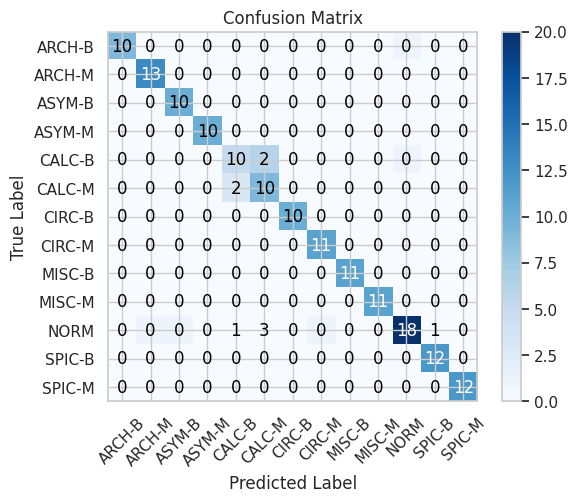

In [ ]:
# # Generate the confusion matrix
r_cm = confusion_matrix(y_true, y_pred)

# # Plot the confusion matrix with annotations
plt.imshow(r_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = test_generator.class_indices
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# # Add annotations to the confusion matrix cells
thresh = r_cm.max() / 2.
for i in range(r_cm.shape[0]):
     for j in range(r_cm.shape[1]):
         plt.text(j, i, cm[i, j], ha='center', va='center',
                  color='white' if r_cm[i, j] > thresh else 'black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
num_classes = r_cm.shape[0]
tp = np.diag(r_cm)
tn = np.sum(r_cm) - (np.sum(r_cm, axis=0) + np.sum(r_cm, axis=1) - tp)
fp = np.sum(r_cm, axis=0) - tp
fn = np.sum(r_cm, axis=1) - tp

# Print the results for each class
for i in range(num_classes):
    print(f"Class {i+1}: TP={tp[i]}, TN={tn[i]}, FP={fp[i]}, FN={fn[i]}")

Class 1: TP=9, TN=147, FP=0, FN=1
Class 2: TP=13, TN=143, FP=1, FN=0
Class 3: TP=10, TN=146, FP=1, FN=0
Class 4: TP=10, TN=147, FP=0, FN=0
Class 5: TP=5, TN=142, FP=3, FN=7
Class 6: TP=9, TN=139, FP=6, FN=3
Class 7: TP=10, TN=147, FP=0, FN=0
Class 8: TP=11, TN=145, FP=1, FN=0
Class 9: TP=11, TN=146, FP=0, FN=0
Class 10: TP=11, TN=146, FP=0, FN=0
Class 11: TP=20, TN=132, FP=2, FN=3
Class 12: TP=12, TN=145, FP=0, FN=0
Class 13: TP=12, TN=145, FP=0, FN=0


In [ ]:
from keras.applications import VGG19
epochs = 50
# Load the pre-trained VGG19 model
VGG19_base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in VGG19_base_model.layers:
    layer.trainable = False

# Add custom layers on top of the pre-trained model
x = VGG19_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
VGG19_model = Model(inputs=VGG19_base_model.input, outputs=predictions)

# Compile the model
optimizer = Adam(lr=0.001)
VGG19_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(patience=15, restore_best_weights=True)

# Train the model with early stopping
v = VGG19_model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=[early_stopping])



Epoch 1/50
32/32 [==============================] - 62s 2s/step - loss: 2.6411 - accuracy: 0.2601 - val_loss: 1.7089 - val_accuracy: 0.4464
Epoch 2/50
32/32 [==============================] - 60s 2s/step - loss: 1.4596 - accuracy: 0.5270 - val_loss: 1.2674 - val_accuracy: 0.5121
Epoch 3/50
32/32 [==============================] - 60s 2s/step - loss: 1.0795 - accuracy: 0.6693 - val_loss: 1.0527 - val_accuracy: 0.6471
Epoch 4/50
32/32 [==============================] - 61s 2s/step - loss: 0.8299 - accuracy: 0.7517 - val_loss: 0.8622 - val_accuracy: 0.7336
Epoch 5/50
32/32 [==============================] - 61s 2s/step - loss: 0.6737 - accuracy: 0.8096 - val_loss: 0.8262 - val_accuracy: 0.7197
Epoch 6/50
32/32 [==============================] - 61s 2s/step - loss: 0.6242 - accuracy: 0.8253 - val_loss: 0.8111 - val_accuracy: 0.7439
Epoch 7/50
32/32 [==============================] - 61s 2s/step - loss: 0.5463 - accuracy: 0.8342 - val_loss: 0.6555 - val_accuracy: 0.7612
Epoch 8/50
32/32 [==

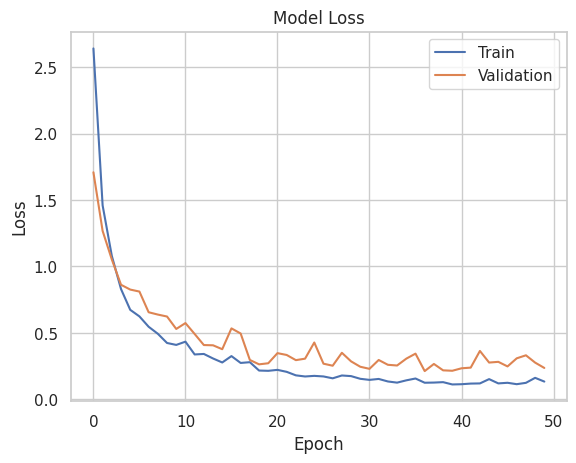

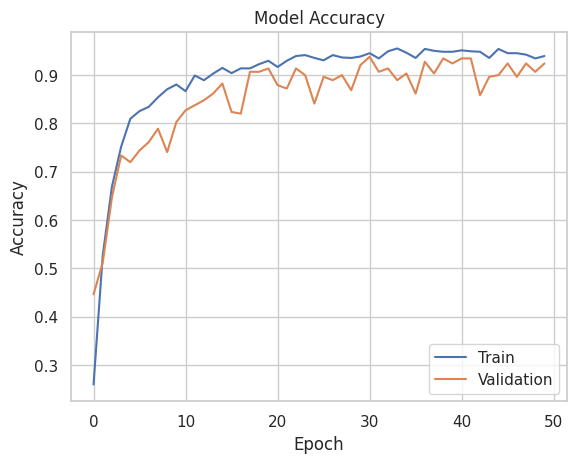

In [ ]:
plt.plot(v.history['loss'])
plt.plot(v.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


plt.plot(v.history['accuracy'])
plt.plot(v.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# # Make predictions on the test set
y_true = test_generator.classes
y_pred = VGG19_model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# # Generate the classification report
target_names = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=target_names)

print(report)

157/157 [==============================] - 11s 66ms/step
              precision    recall  f1-score   support

      ARCH-B       1.00      1.00      1.00        10
      ARCH-M       0.93      1.00      0.96        13
      ASYM-B       1.00      1.00      1.00        10
      ASYM-M       1.00      1.00      1.00        10
      CALC-B       0.79      0.92      0.85        12
      CALC-M       0.89      0.67      0.76        12
      CIRC-B       0.77      1.00      0.87        10
      CIRC-M       1.00      1.00      1.00        11
      MISC-B       1.00      1.00      1.00        11
      MISC-M       1.00      1.00      1.00        11
        NORM       0.95      0.78      0.86        23
      SPIC-B       0.92      1.00      0.96        12
      SPIC-M       1.00      1.00      1.00        12

    accuracy                           0.94       157
   macro avg       0.94      0.95      0.94       157
weighted avg       0.94      0.94      0.93       157



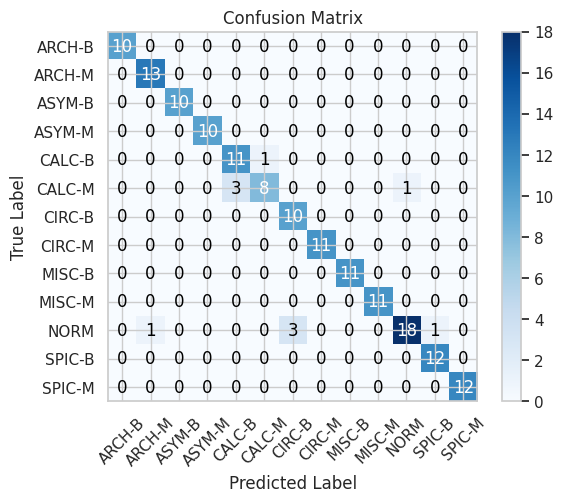

In [ ]:
# # Generate the confusion matrix
v_cm = confusion_matrix(y_true, y_pred)

# # Plot the confusion matrix with annotations
plt.imshow(v_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = test_generator.class_indices
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# # Add annotations to the confusion matrix cells
thresh = v_cm.max() / 2.
for i in range(v_cm.shape[0]):
     for j in range(v_cm.shape[1]):
         plt.text(j, i, v_cm[i, j], ha='center', va='center',
                  color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
num_classes = v_cm.shape[0]
tp = np.diag(v_cm)
tn = np.sum(v_cm) - (np.sum(v_cm, axis=0) + np.sum(v_cm, axis=1) - tp)
fp = np.sum(v_cm, axis=0) - tp
fn = np.sum(v_cm, axis=1) - tp

# Print the results for each class
for i in range(num_classes):
    print(f"Class {i+1}: TP={tp[i]}, TN={tn[i]}, FP={fp[i]}, FN={fn[i]}")

Class 1: TP=10, TN=147, FP=0, FN=0
Class 2: TP=13, TN=143, FP=1, FN=0
Class 3: TP=10, TN=147, FP=0, FN=0
Class 4: TP=10, TN=147, FP=0, FN=0
Class 5: TP=11, TN=142, FP=3, FN=1
Class 6: TP=8, TN=144, FP=1, FN=4
Class 7: TP=10, TN=144, FP=3, FN=0
Class 8: TP=11, TN=146, FP=0, FN=0
Class 9: TP=11, TN=146, FP=0, FN=0
Class 10: TP=11, TN=146, FP=0, FN=0
Class 11: TP=18, TN=133, FP=1, FN=5
Class 12: TP=12, TN=144, FP=1, FN=0
Class 13: TP=12, TN=145, FP=0, FN=0


VIT MODEL

In [ ]:
!pip install timm

In [ ]:
!pip install torchsummary

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import timm
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision import transforms
from torchsummary import summary
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
#ViT MODEL WITH PRETRAINED WEIGHTS
vit_model = timm.create_model('vit_base_patch16_224', pretrained=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vit_model.to(device)

# FREEZE AND UNFREEZE BASE PARAMETERS
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

unfreeze_layers = ['blocks.10', 'blocks.11', 'head']
for name, parameter in vit_model.named_parameters():
    for layer_name in unfreeze_layers:
        if layer_name in name:
            parameter.requires_grad = True

vit_model.head = nn.Linear(in_features=vit_model.num_features, out_features=num_classes).to(device)

# MODEL SUMMARY
summary(vit_model, input_size=(3, 224, 224), device=device.type)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 768, 14, 14]         590,592
          Identity-2             [-1, 196, 768]               0
        PatchEmbed-3             [-1, 196, 768]               0
           Dropout-4             [-1, 197, 768]               0
          Identity-5             [-1, 197, 768]               0
          Identity-6             [-1, 197, 768]               0
         LayerNorm-7             [-1, 197, 768]           1,536
            Linear-8            [-1, 197, 2304]       1,771,776
          Identity-9          [-1, 12, 197, 64]               0
         Identity-10          [-1, 12, 197, 64]               0
           Linear-11             [-1, 197, 768]         590,592
          Dropout-12             [-1, 197, 768]               0
        Attention-13             [-1, 197, 768]               0
         Identity-14             [-1, 1

In [ ]:
# DATA LOADER- TRAIN, TEST AND VALIDATION
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_dataset = ImageFolder(train_data_dir, transform=train_transform)
train_data_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, worker_count=3)

validation_dataset = ImageFolder(validation_data_dir, transform=val_test_transform)
validation_data_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False, worker_count=3)

test_dataset = ImageFolder(test_data_dir, transform=val_test_transform)
test_data_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, worker_count=3)

In [ ]:
# DEFINE LOSS FUNCTION AND OPTIMIZER
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vit_model.parameters(), lr=0.001)

# CREATING LIST FOR LOSS AND ACCURACY
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# DEFINING TRAINING LOOP
def train():
    vit_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = vit_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_data_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

# DEFINING VALIDATION LOOP
def validate():
    vit_model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in validation_data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = vit_model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs, labels)
            running_loss += loss.item()
    accuracy = 100 * correct / total
    epoch_loss = running_loss / len(validation_data_loader)
    val_losses.append(epoch_loss)
    val_accuracies.append(accuracy)
    return accuracy

In [ ]:
#TRAINING AND VALIDATION
num_epochs = 50
for epoch in range(num_epochs):
    train()
    accuracy = validate()
    print(f'Epoch [{epoch+1}/{num_epochs}] - '
          f'Training Accuracy: {train_accuracies[-1]:.2f}%, '
          f'Validation Accuracy: {val_accuracies[-1]:.2f}%, '
          f'Training Loss: {train_losses[-1]:.4f}, '
          f'Validation Loss: {val_losses[-1]:.4f}')

Epoch [1/50] - Training Accuracy: 93.13%, Validation Accuracy: 88.24%, Training Loss: 0.1853, Validation Loss: 0.2694
Epoch [2/50] - Training Accuracy: 93.33%, Validation Accuracy: 94.81%, Training Loss: 0.1496, Validation Loss: 0.2236
Epoch [3/50] - Training Accuracy: 94.90%, Validation Accuracy: 95.16%, Training Loss: 0.1227, Validation Loss: 0.2266
Epoch [4/50] - Training Accuracy: 94.50%, Validation Accuracy: 93.08%, Training Loss: 0.1137, Validation Loss: 0.1816
Epoch [5/50] - Training Accuracy: 95.78%, Validation Accuracy: 96.54%, Training Loss: 0.0734, Validation Loss: 0.1369
Epoch [6/50] - Training Accuracy: 95.39%, Validation Accuracy: 93.43%, Training Loss: 0.0847, Validation Loss: 0.1409
Epoch [7/50] - Training Accuracy: 94.21%, Validation Accuracy: 91.35%, Training Loss: 0.1326, Validation Loss: 0.2619
Epoch [8/50] - Training Accuracy: 95.09%, Validation Accuracy: 91.35%, Training Loss: 0.1093, Validation Loss: 0.1501
Epoch [9/50] - Training Accuracy: 95.98%, Validation Acc

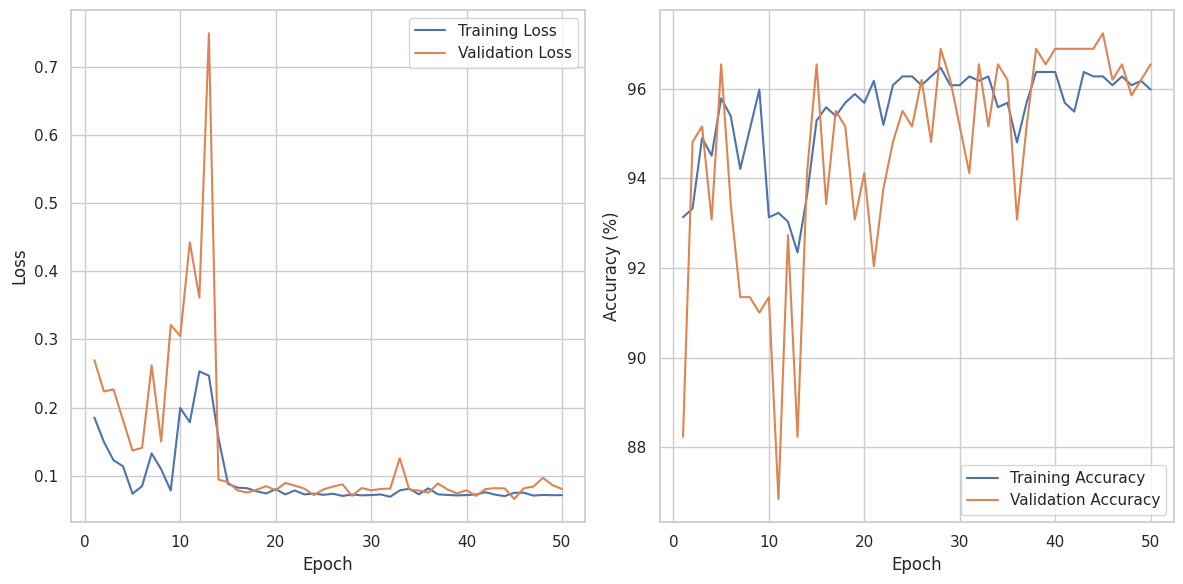

In [ ]:
# PLOT TRAINING AND VALIDATION GRAPH
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

vit_model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs =  vit_model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())


print(classification_report(y_true, y_pred, target_names=class_names))


              precision    recall  f1-score   support

      ARCH-B       1.00      1.00      1.00        10
      ARCH-M       1.00      1.00      1.00        13
      ASYM-B       1.00      1.00      1.00        10
      ASYM-M       1.00      1.00      1.00        10
      CALC-B       0.80      1.00      0.89        12
      CALC-M       1.00      0.75      0.86        12
      CIRC-B       0.91      1.00      0.95        10
      CIRC-M       1.00      1.00      1.00        11
      MISC-B       0.85      1.00      0.92        11
      MISC-M       1.00      1.00      1.00        11
        NORM       1.00      0.83      0.90        23
      SPIC-B       0.92      1.00      0.96        12
      SPIC-M       1.00      1.00      1.00        12

    accuracy                           0.96       157
   macro avg       0.96      0.97      0.96       157
weighted avg       0.96      0.96      0.95       157



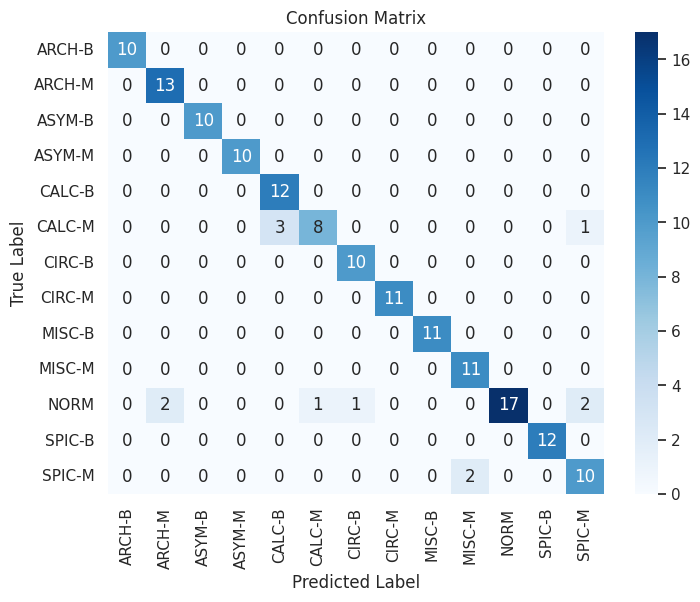

In [ ]:
# PLOT CONFUSION MATRIX GRAPH
vit_conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(vit_conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#PRINT CONFUSION MATRIX REPORT FOR EACH CLASS

num_classes = vit_conf_matrix.shape[0]
tp = np.diag(vit_conf_matrix)
tn = np.sum(vit_conf_matrix) - (np.sum(vit_conf_matrix, axis=0) + np.sum(vit_conf_matrix, axis=1) - tp)
fp = np.sum(vit_conf_matrix, axis=0) - tp
fn = np.sum(vit_conf_matrix, axis=1) - tp

for i in range(num_classes):
    print(f"Class {i+1}: TP={tp[i]}, TN={tn[i]}, FP={fp[i]}, FN={fn[i]}")

Class 1: TP=10, TN=147, FP=0, FN=0
Class 2: TP=13, TN=142, FP=2, FN=0
Class 3: TP=10, TN=147, FP=0, FN=0
Class 4: TP=10, TN=147, FP=0, FN=0
Class 5: TP=12, TN=142, FP=3, FN=0
Class 6: TP=8, TN=144, FP=1, FN=4
Class 7: TP=10, TN=146, FP=1, FN=0
Class 8: TP=11, TN=146, FP=0, FN=0
Class 9: TP=11, TN=146, FP=0, FN=0
Class 10: TP=11, TN=144, FP=2, FN=0
Class 11: TP=17, TN=134, FP=0, FN=6
Class 12: TP=12, TN=145, FP=0, FN=0
Class 13: TP=10, TN=142, FP=3, FN=2
